# Embedding Space Tutorial

This is a tutorial for how to use the package to train a model to make an embedding space and then make predictions on new data to generate an embedding space

In [1]:
# Load required packages
import scanpy as sc
from sklearn.model_selection import StratifiedKFold

import sys
sys.path.append('../') # Add parent directory to path, since it contains the scNear package
import scNear

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data

Start by reading Anndata and split it into a training set and a testing set. <br>
It's worth noting that adata.X, containing the counts, should be normalized. If this isn't the case, there's a implemented normalization function in the package. Simply run *scNear.log1p_normalize(adata)* to apply scale factor and log1p normalize adata.X.

In [2]:
adata = sc.read("data/Baron.h5ad", cache=True)

### Split data for training and testing

# Initialize Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Take the first fold
adata_train = adata.copy()
adata_test = adata.copy()
for train_index, test_index in stratified_kfold.split(adata.X, adata.obs["cell_type"]):
    adata_train = adata_train[train_index, :].copy()
    adata_test = adata_test[test_index, :].copy()
    break # Break to get the first fold

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
print(f"Train data contains {adata_train.X.shape[0]} cells and {adata_train.X.shape[1]} genes")
print(f"Test data contains {adata_test.X.shape[0]} cells and {adata_test.X.shape[1]} genes")

Train data contains 6855 cells and 14322 genes
Test data contains 1714 cells and 14322 genes


## Train model

Next, we want to train the model. This can simply be achieved by running the following line. <br>
Once trained it will save all the information needed to make predictions using the model under *trained_models/*.<br>
One needs to give the model the training Anndata, the target key in adata.obs that contains cell type information, and the batch key in adata.obs that contains the batch effect information. <br>
For this dataset, patient ID is the batch effect of interest.

In [4]:
scNear.train(adata=adata_train, target_key="cell_type", batch_key="patientID")

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation nam

Number of parameters: 2558600

Start Training



  2%|▏         | 1/50 [00:29<24:29, 30.00s/it]

Epoch 1 | Training loss: 0.7264 | Validation loss: 0.5434


  4%|▍         | 2/50 [00:55<22:06, 27.64s/it]

Epoch 2 | Training loss: 0.3885 | Validation loss: 0.2353


  6%|▌         | 3/50 [01:18<19:56, 25.45s/it]

Epoch 3 | Training loss: 0.3325 | Validation loss: 0.2100


  8%|▊         | 4/50 [01:41<18:42, 24.40s/it]

Epoch 4 | Training loss: 0.2083 | Validation loss: 0.1812


 10%|█         | 5/50 [02:04<17:54, 23.88s/it]

Epoch 5 | Training loss: 0.2261 | Validation loss: 0.1785


 12%|█▏        | 6/50 [02:30<17:59, 24.54s/it]

Epoch 6 | Training loss: 0.2347 | Validation loss: 0.1609


 14%|█▍        | 7/50 [02:58<18:25, 25.72s/it]

Epoch 7 | Training loss: 0.2177 | Validation loss: 0.1575


 16%|█▌        | 8/50 [03:23<17:45, 25.36s/it]

Epoch 8 | Training loss: 0.1632 | Validation loss: 0.1387


 18%|█▊        | 9/50 [03:47<17:08, 25.09s/it]

Epoch 9 | Training loss: 0.1308 | Validation loss: 0.1353


 20%|██        | 10/50 [04:12<16:43, 25.08s/it]

Epoch 10 | Training loss: 0.1325 | Validation loss: 0.1339


 22%|██▏       | 11/50 [04:38<16:27, 25.32s/it]

Epoch 11 | Training loss: 0.1204 | Validation loss: 0.1316


 24%|██▍       | 12/50 [05:05<16:20, 25.80s/it]

Epoch 12 | Training loss: 0.1118 | Validation loss: 0.1288


 26%|██▌       | 13/50 [05:32<16:10, 26.22s/it]

Epoch 13 | Training loss: 0.1095 | Validation loss: 0.1294


 28%|██▊       | 14/50 [05:56<15:21, 25.59s/it]

Epoch 14 | Training loss: 0.1141 | Validation loss: 0.1292


 30%|███       | 15/50 [06:18<14:13, 24.38s/it]

Epoch 15 | Training loss: 0.1009 | Validation loss: 0.1271


 32%|███▏      | 16/50 [06:39<13:15, 23.40s/it]

Epoch 16 | Training loss: 0.1074 | Validation loss: 0.1276


 34%|███▍      | 17/50 [07:02<12:46, 23.22s/it]

Epoch 17 | Training loss: 0.1109 | Validation loss: 0.1270


 36%|███▌      | 18/50 [07:25<12:20, 23.13s/it]

Epoch 18 | Training loss: 0.1016 | Validation loss: 0.1269


 38%|███▊      | 19/50 [07:56<13:10, 25.51s/it]

Epoch 19 | Training loss: 0.1035 | Validation loss: 0.1273


 40%|████      | 20/50 [08:23<13:00, 26.02s/it]

Epoch 20 | Training loss: 0.1043 | Validation loss: 0.1277


 42%|████▏     | 21/50 [08:52<13:00, 26.91s/it]

Epoch 21 | Training loss: 0.1155 | Validation loss: 0.1274


 44%|████▍     | 22/50 [09:20<12:47, 27.40s/it]

Epoch 22 | Training loss: 0.1076 | Validation loss: 0.1278


 46%|████▌     | 23/50 [09:46<12:08, 26.96s/it]

Epoch 23 | Training loss: 0.1095 | Validation loss: 0.1268


 48%|████▊     | 24/50 [10:11<11:18, 26.11s/it]

Epoch 24 | Training loss: 0.1153 | Validation loss: 0.1287


 50%|█████     | 25/50 [10:35<10:43, 25.72s/it]

Epoch 25 | Training loss: 0.1031 | Validation loss: 0.1276


 52%|█████▏    | 26/50 [11:00<10:08, 25.35s/it]

Epoch 26 | Training loss: 0.1098 | Validation loss: 0.1288


 54%|█████▍    | 27/50 [11:29<10:09, 26.48s/it]

Epoch 27 | Training loss: 0.1042 | Validation loss: 0.1279


 56%|█████▌    | 28/50 [11:59<10:05, 27.51s/it]

Epoch 28 | Training loss: 0.1082 | Validation loss: 0.1272


 58%|█████▊    | 29/50 [12:24<09:19, 26.66s/it]

Epoch 29 | Training loss: 0.1032 | Validation loss: 0.1281


 60%|██████    | 30/50 [12:52<09:01, 27.08s/it]

Epoch 30 | Training loss: 0.1070 | Validation loss: 0.1279


 62%|██████▏   | 31/50 [13:19<08:38, 27.30s/it]

Epoch 31 | Training loss: 0.1012 | Validation loss: 0.1276


 64%|██████▍   | 32/50 [13:47<08:14, 27.50s/it]

Epoch 32 | Training loss: 0.0988 | Validation loss: 0.1276


 66%|██████▌   | 33/50 [14:13<07:38, 26.95s/it]

Epoch 33 | Training loss: 0.1051 | Validation loss: 0.1285


 68%|██████▊   | 34/50 [14:40<07:12, 27.03s/it]

Epoch 34 | Training loss: 0.1094 | Validation loss: 0.1294


 70%|███████   | 35/50 [15:05<06:36, 26.45s/it]

Epoch 35 | Training loss: 0.1036 | Validation loss: 0.1290


 72%|███████▏  | 36/50 [15:35<06:21, 27.27s/it]

Epoch 36 | Training loss: 0.0993 | Validation loss: 0.1300


 74%|███████▍  | 37/50 [16:03<05:57, 27.50s/it]

Epoch 37 | Training loss: 0.1027 | Validation loss: 0.1289


 76%|███████▌  | 38/50 [16:27<05:18, 26.55s/it]

Epoch 38 | Training loss: 0.1086 | Validation loss: 0.1304


 78%|███████▊  | 39/50 [16:49<04:38, 25.29s/it]

Epoch 39 | Training loss: 0.1050 | Validation loss: 0.1304


 80%|████████  | 40/50 [17:11<04:01, 24.18s/it]

Epoch 40 | Training loss: 0.1060 | Validation loss: 0.1292


 82%|████████▏ | 41/50 [17:32<03:30, 23.38s/it]

Epoch 41 | Training loss: 0.1023 | Validation loss: 0.1303


 84%|████████▍ | 42/50 [17:56<03:07, 23.47s/it]

Epoch 42 | Training loss: 0.1050 | Validation loss: 0.1304


 84%|████████▍ | 42/50 [18:18<03:29, 26.15s/it]

Epoch 43 | Training loss: 0.1019 | Validation loss: 0.1299
Stopped training using EarlyStopping at epoch 43

**Finished training**

Best validation loss (reached after 23 epochs): 0.12679324559867383

Training time: 18.30 minutes
Total training time: 18.36 minutes



## Predict on test data

Next, we want to make predictions using the model.<br>
It will retrieve the information from *trained_models/* to make predictions.<br>
To run predict one needs to provide Anndata.

In [5]:
predictions = scNear.predict(adata=adata_test)

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Visualize test data embedding space

Here we use UMAP to visualize the embedding space the model creates for the test data

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


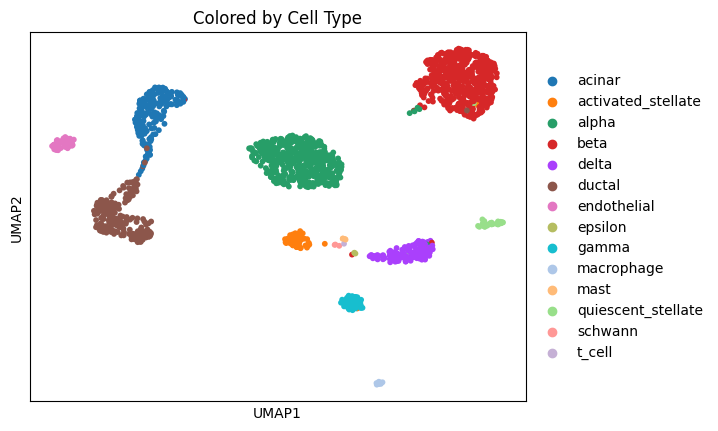

In [6]:
adata_test.obsm["latent_space"] = predictions

sc.pp.neighbors(adata_test, use_rep="latent_space")
sc.tl.umap(adata_test)
sc.pl.umap(adata_test, color="cell_type", ncols=1, title="Colored by Cell Type")

## Make cell type vector representations

Calculates the centorids of each cell type cluster in latent space and return it as the cell type representation. <br>
This is simply achieved by runing the line below. <br>
The representations are also saved as a .csv in the *cell_type_vector_representation/* folder.

In [7]:
representations = scNear.generate_representations(adata=adata_test, target_key="cell_type")

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
representations

,acinar,activated_stellate,alpha,beta,delta,ductal,endothelial,epsilon,gamma,macrophage,mast,quiescent_stellate,schwann,t_cell
0,0.287736,1.458305,0.043356,-0.030558,-1.384781,-0.419595,0.674401,-0.184385,-1.878783,0.716284,1.153386,-0.309663,1.959518,0.459208
1,-0.775065,0.277407,2.030629,1.218248,1.312809,-0.898122,-0.973419,-0.541866,-0.318498,-0.406702,-2.272339,-0.987073,0.900983,-1.607613
2,-2.312285,0.128571,0.150370,0.236973,1.462326,0.157929,0.362356,-0.383255,-0.532147,1.596176,0.097102,0.180807,-0.199802,-1.067941
3,-1.552520,0.907145,0.280347,-0.201530,-0.765509,-0.482278,1.466002,0.038742,0.187112,-2.141400,0.579432,0.390134,0.438531,0.547432
4,-0.641601,0.482979,-0.065690,-0.137003,0.815527,-1.733303,-0.844981,-0.745285,-0.125174,2.854293,2.641200,-0.802423,-0.419514,0.189321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.145299,1.007363,-0.978028,-0.440589,0.050382,-0.777937,-0.979368,1.428966,1.106433,-2.286520,0.797333,-0.116201,-0.311799,-0.653263
96,0.195552,-2.340337,0.657188,0.976818,-0.087427,0.000273,-1.508679,2.065309,0.433521,-1.906074,0.221004,-1.815169,0.269354,0.523479
97,0.588301,0.624152,0.297954,0.640000,-0.468884,-0.362846,-0.683226,0.430966,-1.504020,-0.913621,-1.531856,1.889564,0.100740,-0.788340
98,1.476991,-0.851806,0.258428,-0.510553,0.600098,-0.756514,-1.251052,-0.249170,-0.067113,1.784804,0.357079,-1.203038,0.824744,1.393655
